# ALGORITMOS DE BUSUQEDA 

## PREPARACION DE dATOS

### IMPORTAR LIBRERIAS

In [16]:
import networkx as nx #Libreria de redes
import matplotlib.pyplot as plt #libreira para plotear
import pandas as pd #libreria de maneo de datos
import scipy as sp #libreria oython cientifico
import numpy as np #libreira manejo de matrices
import random #generador de elecciones aleatorias
import operator #operador



### Creacion DataFrame, red y Caracteristicas

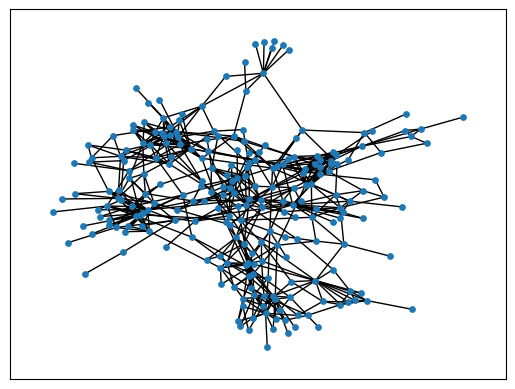

In [17]:
Redani=pd.read_csv("CN_spa.csv",header=None,sep=",") #importar dataframe, lista de enlaces
G = nx.from_pandas_edgelist(Redani,source=0,target=1) #Red
grafo=nx.draw_networkx(G,with_labels=False,node_size=15)#Dibujar la red
plt.show()

In [18]:
print("numero de nodos:",G.number_of_nodes(), "numero de enlaces:",G.number_of_edges())

numero de nodos: 236 numero de enlaces: 611


In [19]:
#matriz de adyacencia
adyacencia=nx.adjacency_matrix(G).todense()
#dataframe de la matriz de adyacencia
DFadj=pd.DataFrame(adyacencia)
DFadj.to_csv('adjacencymatrix.csv')

### Creacion red auxiliar

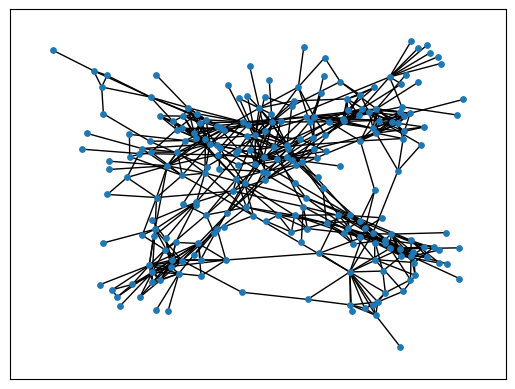

In [20]:
DFsec=pd.read_csv("adjacencymatrix.csv",header=None)
p1=DFsec.drop([0],axis=0) #elimina la columna de cabecera
p2=p1.drop([0],axis=1) #elimina la fila de cabecera
Pg=nx.from_pandas_adjacency(p2)
G1 = nx.from_pandas_adjacency(p2)
grafo=nx.draw_networkx(G1,with_labels=False,node_size=15)

In [21]:
print("numero de nodos:",G1.number_of_nodes(), "numero de enlaces:",G1.number_of_edges())

numero de nodos: 236 numero de enlaces: 611


#### Distribucion de grados de la red de numeros

In [22]:
degree=nx.degree(G1)
degree1=pd.DataFrame(degree)
#listdegree1=list(degree)
#degree2=pd.DataFrame(listdegree1, dtype = np.float64)
degree1

,0,1
0,236,5
1,235,4
2,234,7
3,233,1
4,232,12
...,...,...
231,5,10
232,4,2
233,3,14
234,2,3


#### Distribucion de grados de la red animal

In [23]:
degreeani=nx.degree(G)
degree1ani=pd.DataFrame(degreeani)
#listdegree1ani=list(degreeani)
#degree2ani=pd.DataFrame(listdegree1ani, dtype = np.float64)
degree1ani

,0,1
0,abeja,8
1,abejorro,3
2,aguila,14
3,aguilucho,2
4,arana,10
...,...,...
231,vaca,12
232,verderol,1
233,vibora,7
234,yegua,4


#### Grado medio

In [24]:
#Grado medio
meandegree=np.mean(degree1.iloc[:,1])
meandegree

5.177966101694915

#### frecuencias de cada grado

In [25]:
pd.value_counts(degree1.iloc[:,1])

1     38
4     32
2     28
3     24
6     22
5     19
7     17
8     14
9     11
10    10
14     9
12     5
11     4
13     2
15     1
Name: 1, dtype: int64

## BUSQUEDA POR GRADO DE NODO

In [26]:
#funcion de busqueda
def walked_nodes_by_degree_prob(network,nodo):
    nodes = list(network.nodes())
    current_node = nodo
    walked_nodes = [current_node]
    while len(walked_nodes) < nx.number_of_nodes(G1): #nx.number_of_nodes(G1)
        neighbors = list(network.neighbors(current_node))
        neighbor_degrees = [network.degree(node) for node in neighbors]
        probabilities = [degree/sum(neighbor_degrees) for degree in neighbor_degrees]
        next_node = random.choices(neighbors, weights=probabilities)[0]
        walked_nodes.append(next_node)
        current_node = next_node
    return walked_nodes

In [27]:
count=1
i=1 #contador
matrix=[] #matriz de resultados
while i < nx.number_of_nodes(G1): #ciclo que crea la matriz nx.number_of_nodes(G1)
    while count < nx.number_of_nodes(G1)+1: #ciclo que recorre la red nx.number_of_nodes(G1)+1
        pp=walked_nodes_by_degree_prob(G1,count)
        count+=1
        matrix.append(pp) #añade las listas a la matriz
        i+=1
newmatrix=np.delete(matrix,0,axis=1) #quita la primera columna
arreglouni=np.ravel(newmatrix)#convierte la mattriz a un arreglo unidimension
valores,frecuencia=np.unique(arreglouni,return_counts=True)#cal val,frec
tabla=[valores,frecuencia]#tabula
dataf=pd.DataFrame(tabla)#dataframe
matrixDF=pd.DataFrame(matrix)
matrixDF.to_csv("matrizF.csv")
print(dataf)

   0    1    2    3    4    5    6    7    8    9    ...  226   227  228  229  \
0    1    2    3    4    5    6    7    8    9   10  ...  227   228  229  230   
1  523   61  947   36  654   12  695  426   79  268  ...  104  1204    6    5   

   230   231  232  233  234  235  
0  231   232  233  234  235  236  
1    2  1133    7  240  160  127  

[2 rows x 236 columns]


In [28]:
unique_values, counts = np.unique(matrix, return_counts=True)
unique_values,counts

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

In [51]:
elementoi=unique_values-1
arreglo=list(G.nodes())
palabra=[]
for elemento in elementoi:
   palabra.append(arreglo[elemento])
#listapalabra=np.reshape(palabra,(1,-1))
frecuenciapalabra=[palabra,counts]


Text(0, 0.5, 'Frecuencia')

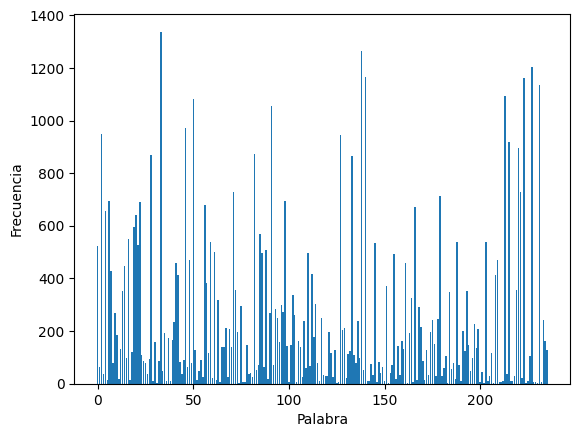

In [52]:
plt.bar(elementoi,counts)
plt.xlabel("Palabra")
#plt.xticks(rotation=90)
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

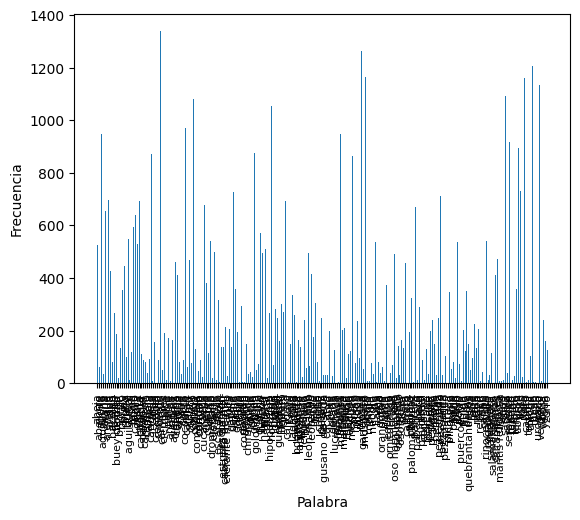

In [58]:
plt.bar(palabra,counts,width=0.5)
plt.xlabel("Palabra")
plt.xticks(rotation=90,fontsize=8)
plt.ylabel("Frecuencia")